In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv("../Clustering/Cluster/LabelsDataset.csv")
df

,PC1,PC2,PC3,PC4,PC5,PC6,Label
0,-3.164672,-0.803202,-1.025820,0.282816,0.014760,0.472629,1
1,-4.436239,-1.987863,-1.349363,-0.267252,0.598739,0.754170,1
2,-3.843192,1.914272,0.351344,-1.291032,-0.564044,-0.216747,1
3,-3.791167,1.602657,0.900057,-1.082825,-0.050485,-0.877389,1
4,-3.496826,2.692341,1.287733,-0.559267,0.181786,-1.055199,1
...,...,...,...,...,...,...,...
310,-4.034398,1.662995,0.482306,-0.565269,0.562479,-0.318743,1
311,-2.784288,2.051527,0.547910,-0.838827,-0.154824,-0.787354,1
312,-4.272413,0.966836,-0.407829,-0.732471,-0.164581,0.361417,1
313,-3.630856,0.151650,-0.539870,-0.581066,-0.276044,0.298388,1


In [4]:
df["Label"].value_counts()

Label
0    123
2    107
1     85
Name: count, dtype: int64

In [5]:
df.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'Label'], dtype='object')

In [7]:
X = df[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']].values
Y = df['Label'].values

In [8]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2)

In [9]:
Xtrain.shape

(252, 6)

In [10]:
Xtest.shape

(63, 6)

In [11]:
Ytrain.shape

(252,)

In [38]:
def print_metrics(ypred, model):
    print("Accuracy:", accuracy_score(Ytest, ypred))
    print("Precision:", precision_score(Ytest, ypred, average='micro'))
    print("Recall:", recall_score(Ytest, ypred, average='micro'))
    print("F1 Score:", f1_score(Ytest, ypred, average='micro'))
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Ytest, ypred), display_labels=model.classes_)
    disp.plot()
    plt.show()
    #print("\nConfusion Matrix:\n", ConfusionMatrixDisplay())

In [37]:
sns.set_style('dark')

# Gaussian Naive Bayes

In [39]:
gnb = GaussianNB()
gnb.fit(Xtrain, Ytrain)

y_pred = gnb.predict(Xtest)

Accuracy: 0.9841269841269841
Precision: 0.9841269841269841
Recall: 0.9841269841269841
F1 Score: 0.9841269841269841


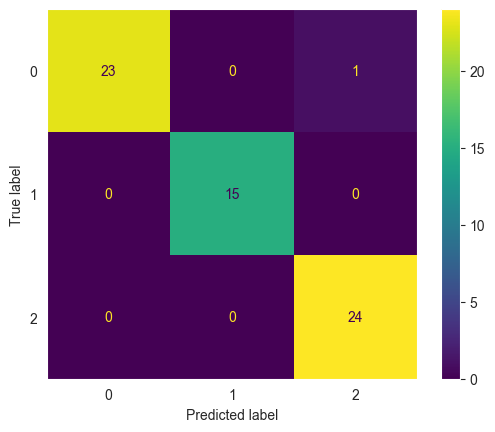

In [40]:
print_metrics(y_pred, gnb)

# KNN

In [41]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean', n_jobs=-1)
knn.fit(Xtrain, Ytrain)

y_pred = knn.predict(Xtest)

Accuracy: 0.9841269841269841
Precision: 0.9841269841269841
Recall: 0.9841269841269841
F1 Score: 0.9841269841269841


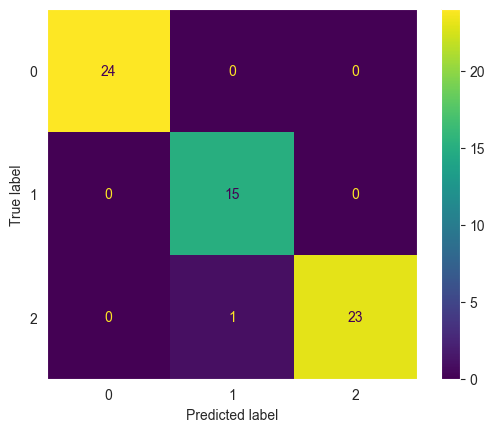

In [42]:
print_metrics(y_pred, knn)

# SVM

In [43]:
svm = SVC(C=0.1,
          kernel='rbf',
          decision_function_shape='ovo',
          )
svm.fit(Xtrain, Ytrain)

y_pred = svm.predict(Xtest)

Accuracy: 0.9682539682539683
Precision: 0.9682539682539683
Recall: 0.9682539682539683
F1 Score: 0.9682539682539683


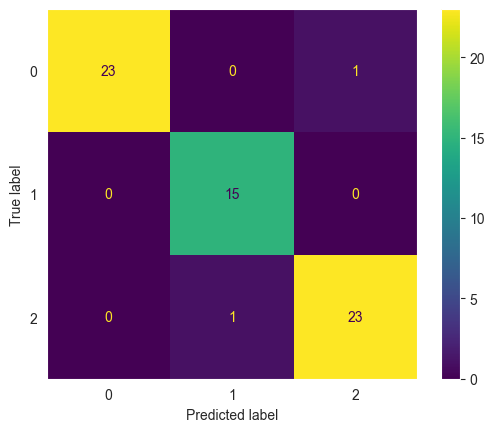

In [44]:
print_metrics(y_pred, svm)

# Decision tree

In [65]:
tree = DecisionTreeClassifier(criterion='gini',
                              splitter='best',
                              max_depth=3,
                              min_samples_split=7,
                              )

tree.fit(Xtrain, Ytrain)

y_pred = tree.predict(Xtest)

Accuracy: 0.9365079365079365
Precision: 0.9365079365079365
Recall: 0.9365079365079365
F1 Score: 0.9365079365079365


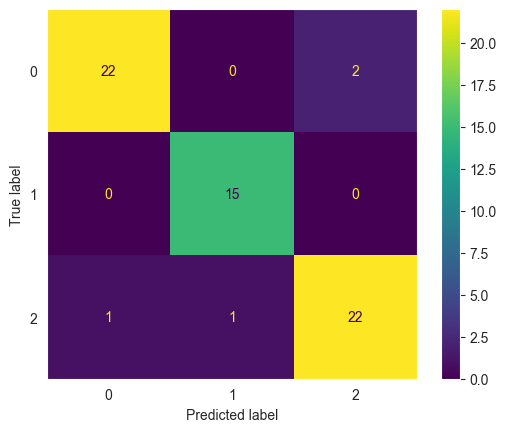

In [66]:
print_metrics(y_pred, tree)

In [67]:
def visualizeTree(tree):
    fig, ax = plt.subplots(figsize=(32,12))
    print("Depth of the tree: ", tree.get_depth())
    print("Number of leaves: ", tree.get_n_leaves())

    plot = plot_tree(
            decision_tree = tree,
            feature_names = df.iloc[:,:-1].columns.tolist(),
            class_names = None,
            filled = True,
            impurity = False,
            fontsize = 11,
            ax = ax
    )

Depth of the tree:  3
Number of leaves:  7


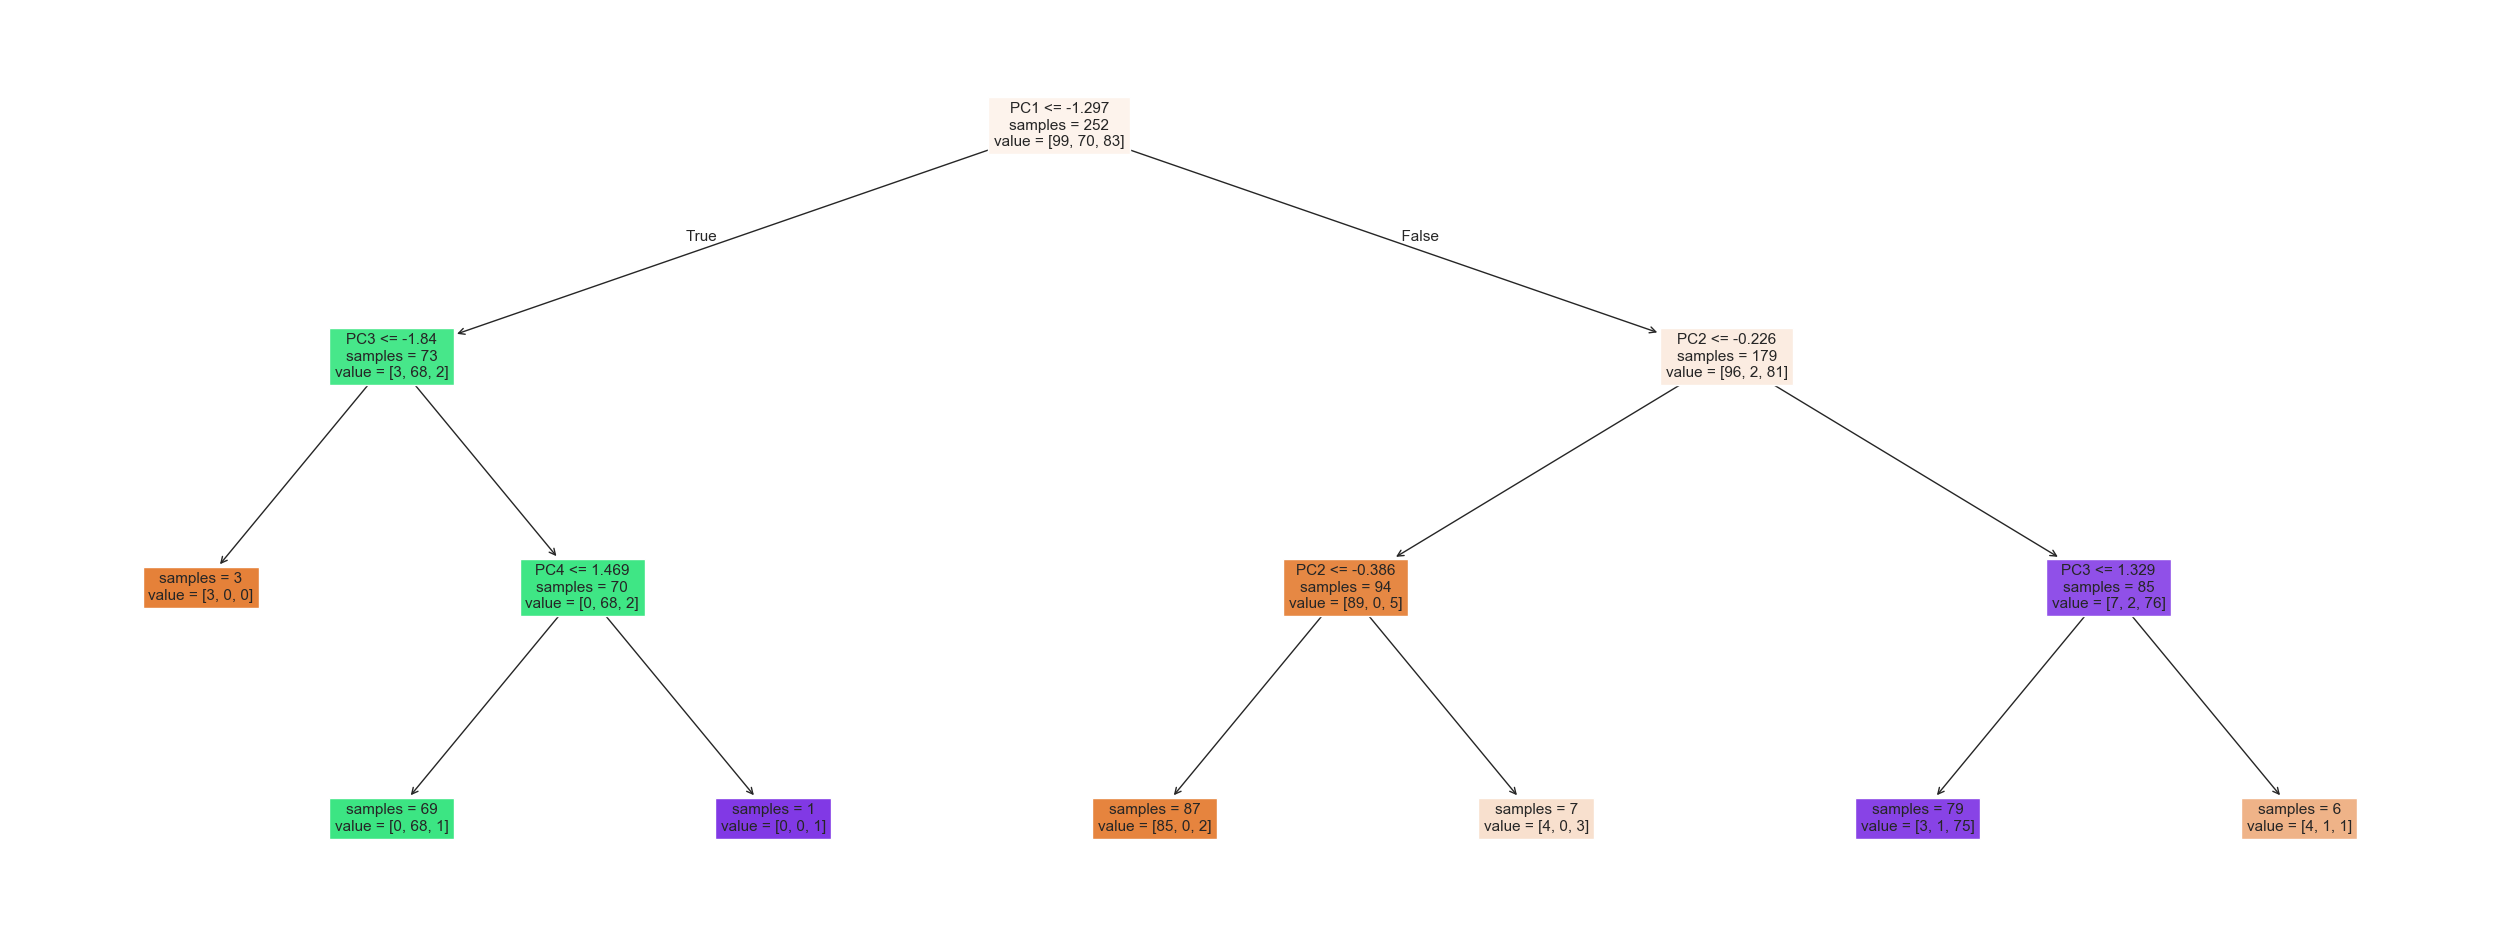

In [68]:
visualizeTree(tree)

# Random forest

In [71]:
rf = RandomForestClassifier(n_estimators=100,
                            criterion='gini',
                            max_depth=3,
                            min_samples_split=7,
                            n_jobs=-1)

rf.fit(Xtrain, Ytrain)

y_pred = rf.predict(Xtest)

Accuracy: 0.9523809523809523
Precision: 0.9523809523809523
Recall: 0.9523809523809523
F1 Score: 0.9523809523809523


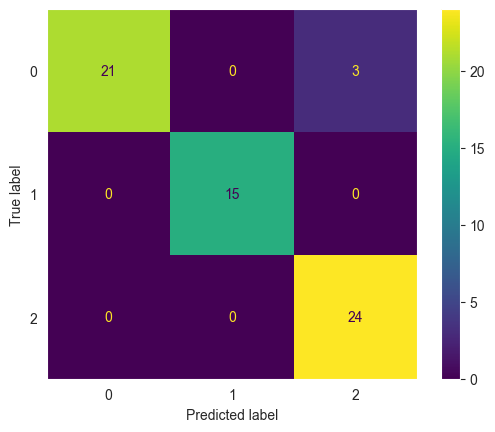

In [72]:
print_metrics(y_pred, rf)

# Gradient Boosting

In [73]:
gb = GradientBoostingClassifier()

gb.fit(Xtrain, Ytrain)

y_pred = gb.predict(Xtest)

Accuracy: 0.9682539682539683
Precision: 0.9682539682539683
Recall: 0.9682539682539683
F1 Score: 0.9682539682539683


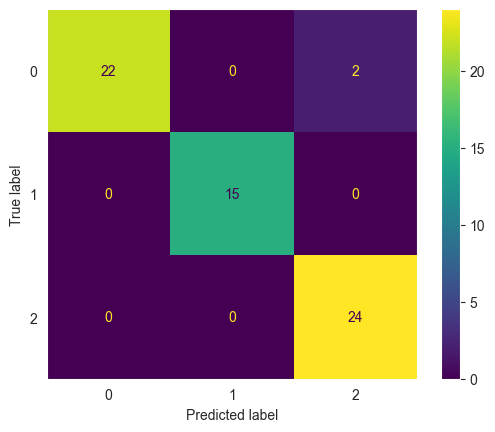

In [74]:
print_metrics(y_pred, gb)

# XGBoost

In [75]:
xgb = XGBClassifier()
xgb.fit(Xtrain, Ytrain)
y_pred = xgb.predict(Xtest)

Accuracy: 0.9682539682539683
Precision: 0.9682539682539683
Recall: 0.9682539682539683
F1 Score: 0.9682539682539683


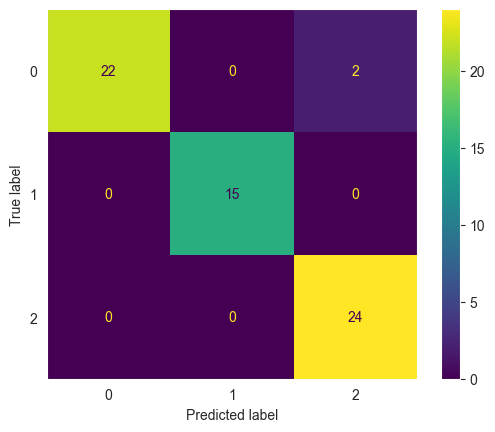

In [76]:
print_metrics(y_pred, xgb)

# Neural Network

In [1]:
import pandas as pd
import numpy as np
import torch 
import torch.nn as nn
import torch.nn.functional as F 
import fastai.tabular.all as ft 

In [10]:
df = pd.read_csv("../Cluster/LabelsDataset.csv")
df["Label"] = df["Label"].astype('category')

In [11]:
src = ft.TabularPandas(
    df,
    procs=[ft.Normalize],
    cont_names=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'],
    y_names='Label',
    splits=ft.RandomSplitter(valid_pct=0.2)(ft.range_of(df))
)

dls = src.dataloaders(bs=32)

In [12]:
learner = ft.tabular_learner(dls,
                             layers=[512,512],
                             metrics=ft.accuracy,
                             opt_func=ft.Adam
                             )

c:\Users\Fernando\anaconda3\envs\redes\Lib\site-packages\fastai\learner.py:51: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **

SuggestedLRs(valley=0.0010000000474974513)

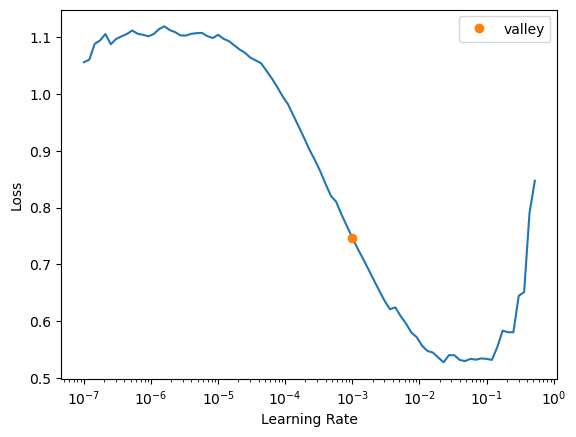

In [13]:
learner.lr_find()

In [14]:
learner.fit_one_cycle(25, 0.001)

epoch,train_loss,valid_loss,accuracy,time
0,0.932012,0.991231,0.793651,00:00
1,0.675825,0.636210,0.968254,00:00
2,0.494184,0.291589,0.968254,00:00
3,0.388829,0.152766,0.984127,00:00
4,0.324905,0.102689,0.984127,00:00
5,0.280709,0.165293,0.920635,00:00
6,0.257652,0.120317,0.952381,00:00
7,0.239410,0.066374,1.000000,00:00
8,0.213406,0.083342,0.984127,00:00
9,0.216952,0.109094,0.968254,00:00


In [15]:
learner.export("NN_classification.pkl")